In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

M = 10 # number of arms
G = nx.Graph()
G = nx.fast_gnp_random_graph(10, 0.6, seed=1,directed=True)
print(nx.is_strongly_connected(G))

#G.add_nodes_from([0, 1, 2, 3])
#G.add_edges_from([(0, 1), (0, 2), (1, 2), (2, 3)])
#G = nx.fast_gnp_random_graph(6, 0.5, seed=40,directed=False) # test.png from this
#G = nx.fast_gnp_random_graph(6, 0.25, seed=42,directed=False) #undirected_unconnected.png from this
#G.add_nodes_from([6])
#G = nx.complete_graph(6)

nodes = list(G.nodes)
for i in nodes:
    G.add_edge(i,i)
A = nx.adjacency_matrix(G)

N = len(G) # number of agents
T = 2000

True


In [2]:
random.seed(42)

In [3]:
a = A.toarray() # make adjacency matrix an array for ease of use
neighbors = [] # list of all agents' neighbors
for i in range(len(a)):
    curr_neighbors = [] # neighbors of current agent
    for j in range(len(a)):
        if a[j][i] == 1:
            curr_neighbors.append(j)
    neighbors.append(curr_neighbors)

num_neighbors = [sum(A.toarray()[:,i]) for i in range(N)] # get cardinality of neighbors for each agent

In [4]:
# initialize all vectors in a matrix for each time step, names corresponding to paper
n = [np.zeros((N,M)) for t in range(T+1)]
x = [np.zeros((N,M)) for t in range(T+1)]
X = [np.zeros((N,M)) for t in range(T+1)]
z = [np.zeros((N,M)) for t in range(T+1)]

# create rwds array to hold all rewards each agent picks
rwds = [np.zeros(N) for t in range(T+1)]

arm_means = [random.uniform(0, 1) for x in range(0, M)] # means between 0 and 1 for all arms
max_mean = max(arm_means) # get max mean

sigma = 0.1 # standard deviation

In [5]:
# initialization step
for agent in range(N):
    for arm in range(M):
        X[1][agent][arm] = np.random.normal(arm_means[arm], sigma)
        n[1][agent][arm] += 1
        z[1][agent][arm] = X[0][agent][arm]
        x[1][agent][arm] = X[0][agent][arm]

In [6]:
for t in range(1,T): # loop over time
    for agent in range(N): # loop through all agents
        Q = [] # corresponds to Q in paper
        
        for arm in range(M):
            q = z[t][agent][arm] + np.sqrt((2*np.log(t))/(num_neighbors[agent]*n[t][agent][arm]))
            Q.append(q)

        candidate = np.argmax(Q)
        
        X[t+1][agent][candidate] = np.random.normal(arm_means[candidate], sigma) # calculate reward for current agent's arm
        rwds[t+1][agent] = X[t+1][agent][candidate] # keep track of chosen reward

        for arm in range(M): # update all arm estimations for this agent
            if arm == candidate: # if chosen arm
                n[t+1][agent][arm] = n[t][agent][arm] + 1
                xsum = 0
                for time in range(t+1): # sum up all rewards so far
                    xsum += X[time][agent][arm]
                x[t+1][agent][arm] = (1/n[t+1][agent][arm])*xsum
            else: # if not chosen arm
                n[t+1][agent][arm] = n[t][agent][arm]
                x[t+1][agent][arm] = x[t][agent][arm] # not mentioned in paper but seems necessary

            zsum = 0
            for neighbor in neighbors[agent]: # look at current agent's neighbors
                zsum += z[t][neighbor][arm] + x[t+1][agent][arm] - x[t][agent][arm] # calculate sum for z update
            z[t+1][agent][arm] = (1/num_neighbors[agent])*zsum # update current agent's z

In [7]:
n[T-1] # check counts at end

array([[  49.,    6.,   11.,    9.,  108.,   64., 1730.,    7.,   17.,
           7.],
       [  21.,    3.,    5.,    4.,   50.,   28., 1884.,    3.,    7.,
           3.],
       [  24.,    3.,    5.,    4.,   56.,   32., 1870.,    3.,    8.,
           3.],
       [  24.,    3.,    5.,    4.,   56.,   32., 1870.,    3.,    8.,
           3.],
       [  28.,    4.,    6.,    5.,   63.,   36., 1849.,    4.,    9.,
           4.],
       [  28.,    4.,    6.,    5.,   63.,   36., 1849.,    4.,    9.,
           4.],
       [  21.,    3.,    5.,    4.,   50.,   28., 1884.,    3.,    7.,
           3.],
       [  24.,    3.,    5.,    4.,   56.,   32., 1870.,    3.,    8.,
           3.],
       [  21.,    3.,    5.,    4.,   50.,   28., 1884.,    3.,    7.,
           3.],
       [  28.,    4.,    6.,    5.,   63.,   37., 1848.,    4.,    9.,
           4.]])

In [8]:
arm_means

[0.6394267984578837,
 0.025010755222666936,
 0.27502931836911926,
 0.22321073814882275,
 0.7364712141640124,
 0.6766994874229113,
 0.8921795677048454,
 0.08693883262941615,
 0.4219218196852704,
 0.029797219438070344]

In [9]:
rwds

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.65410842, 0.64317957, 0.70620038, 0.50574554, 0.73618961,
        0.59655905, 0.77955389, 0.72134118, 0.75626343, 0.51384333]),
 array([0.55583242, 0.44096566, 0.63707148, 0.6717056 , 0.5241697 ,
        0.72452415, 0.65117975, 0.64773934, 0.62039635, 0.67897178]),
 array([0.57359177, 0.67609588, 0.54995232, 0.69210287, 0.52602635,
        0.62660327, 0.5653718 , 0.47858666, 0.65528161, 0.81865687]),
 array([0.01747847, 0.73043983, 0.73569364, 0.83431989, 0.78533401,
        0.77540261, 0.7096235 , 0.68139568, 0.59612861, 0.61645503]),
 array([0.42598103, 0.75171519, 0.40410207, 0.48675958, 1.01083677,
        0.56720651, 0.47325776, 0.64514979, 0.7432797 , 0.55279489]),
 array([0.30469653, 0.74228646, 0.59854908, 0.75153345, 0.77445193,
        0.65761326, 0.67238121, 0.70409974, 0.5237402 , 0.61598108]),
 array([0.75881973, 0.50382939, 0.55045136, 0.62913686, 0.73440853,
    

In [10]:
rwds_tnspose = np.transpose(rwds) # transpose rwds to make it easier to plot

C:\Users\ethan\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\ethan\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


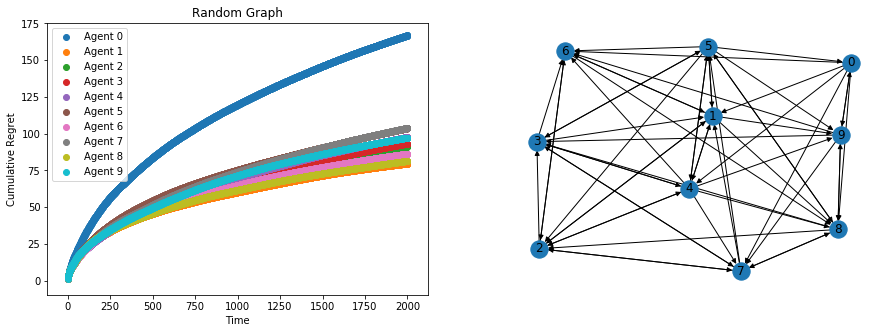

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax = axes.flatten()

for agent in range(len(rwds_tnspose)):
    regret = []
    for t in range(len(rwds_tnspose[agent])):
        avg = np.sum(rwds_tnspose[agent][0:t+1])/(t+1)
        regret.append(max_mean-avg)
    
    regret = np.cumsum(regret)
    ax[0].scatter(range(T+1), regret)


ax[0].set_xlabel("Time")
ax[0].set_ylabel("Cumulative Regret")
labels = ["Agent " + str(i) for i in range(N)]
ax[0].legend(labels)
ax[0].set_title("Random Graph")

nx.draw_networkx(G, ax=ax[1])
ax[1].set_axis_off()

#plt.savefig("undirected_unconnected.png")
plt.show()

In [18]:
num_neighbors

[3, 8, 7, 7, 6, 6, 8, 7, 8, 6]

In [19]:
neighbors

[[0, 5, 9],
 [0, 1, 2, 3, 4, 5, 6, 7],
 [1, 2, 4, 5, 6, 7, 8],
 [2, 3, 4, 5, 7, 8, 9],
 [0, 1, 2, 3, 4, 5],
 [1, 3, 4, 5, 7, 8],
 [0, 1, 2, 3, 4, 5, 6, 9],
 [0, 2, 3, 4, 7, 8, 9],
 [0, 1, 4, 5, 6, 7, 8, 9],
 [0, 1, 4, 5, 8, 9]]